# Importing packages

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns

# -------------------------------------------------------------------------
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
from sklearn import datasets, linear_model, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# -------------------------------------------------------------------------
#Remove warning messages
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [579]:
#Read the CSV File Using Pandas read_csv function
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Attribute Information** - 

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Data cleaning and wrangling

In [580]:
#Getting the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [581]:
#since the dataset can also contain null values
#count total rows in each column which contain null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

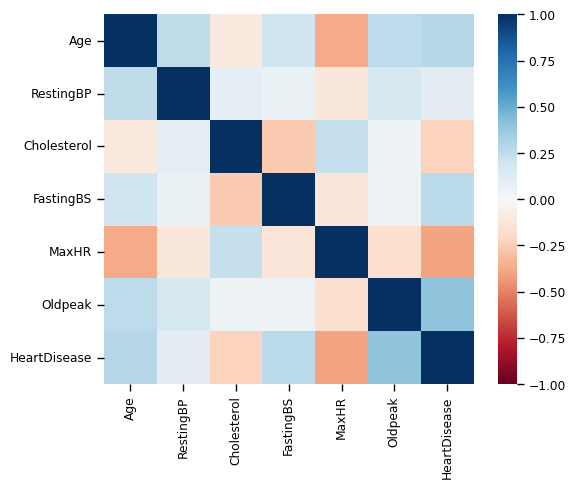

In [582]:
# Checking correlation between the features

corr = data.corr()
%matplotlib inline

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

In [360]:
#Convert object vars and "FastingBS" var to Categorical data type
data[
    [
        "ChestPainType",
        "Sex",
        "FastingBS",
        "RestingECG",
        "ExerciseAngina",
        "ST_Slope",
        "HeartDisease",
    ]
] = data[
    [
        "ChestPainType",
        "Sex",
        "FastingBS",
        "RestingECG",
        "ExerciseAngina",
        "ST_Slope",
        "HeartDisease",
    ]
].astype(
    "category"
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


In [361]:
#Replacing "M" with Male and "F" with Female, and
#HeartDisease to Yes and No.

data["Sex"] = data["Sex"].map({"M": "Male", "F": "Female"})
data["HeartDisease"] = data["HeartDisease"].map({0: "No", 1: "Yes"})

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,Female,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,Male,NAP,150,195,0,Normal,122,N,0.0,Up,No


# Exploratory Data Analysis (EDA)

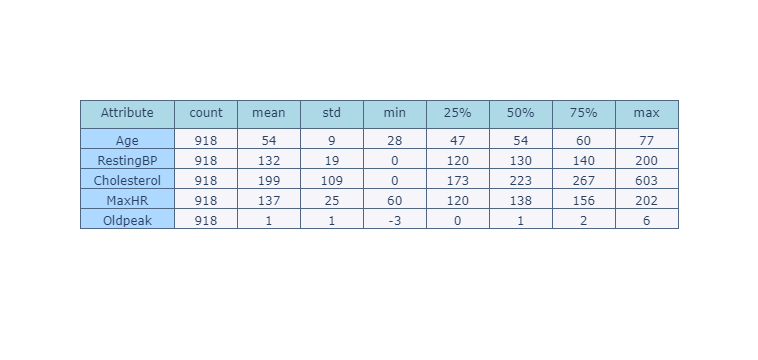

In [362]:
p = data.describe().T
p = p.round()
table = go.Table(
    columnwidth=[1.5]+[1]*10,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 300)', '#f5f5fa'])
    )
)
py.iplot([table], filename='summary_statistics')

### Analysis of the categorical columns

**1. Sex**

In [363]:
sex_counts = data['Sex'].value_counts(normalize=True).round(2) * 100
sex_counts

Male      79.0
Female    21.0
Name: Sex, dtype: float64

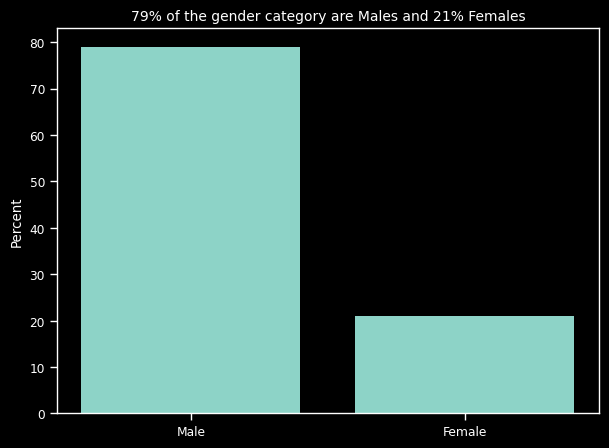

In [364]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(7, 5))
    
    plt.bar(["Male","Female"], sex_counts,align='center', label='Count')

    plt.ylabel("Percent")
    plt.xlabel('')
    plt.title("79% of the gender category are Males and 21% Females", fontsize=10)
    plt.show()

Observations:

Imbalanced data in terms of the Sex variable

**2. ChestPainType Vs Sex**

In [365]:
ChestPainType_vs_Sex = (
    data[["ChestPainType", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Percentage")
    .sort_values(by="ChestPainType")
)
ChestPainType_vs_Sex["Percentage"] = ChestPainType_vs_Sex["Percentage"].round(2) * 100
ChestPainType_vs_Sex

,ChestPainType,Sex,Percentage
0,ASY,Male,46.0
3,ASY,Female,8.0
2,ATA,Male,12.0
4,ATA,Female,7.0
1,NAP,Male,16.0
5,NAP,Female,6.0
6,TA,Male,4.0
7,TA,Female,1.0


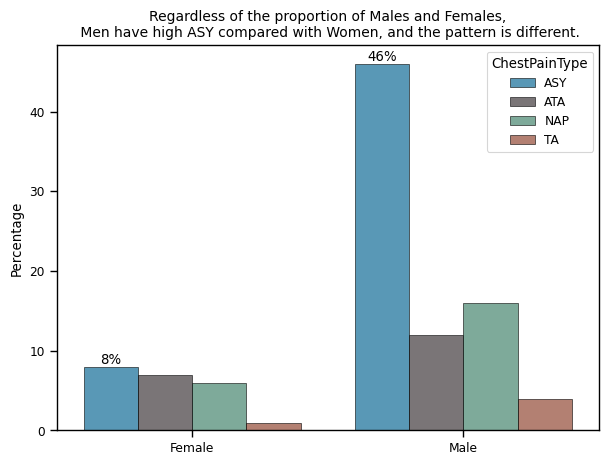

In [366]:
#PLotting the ChestPainType Vs Sex

plt.figure(figsize=(7, 5))

palette = {"ASY": "#1b85b8", "ATA": "#5a5255", "NAP": "#559e83", "TA": "#ae5a41"}

ax1 = sns.barplot(
    data=ChestPainType_vs_Sex,
    x="Sex",
    hue="ChestPainType",
    palette=palette,
    y="Percentage",
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
)

values1 = ax1.containers[0].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[0], labels=labels)

ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title(
    "Regardless of the proportion of Males and Females,\n Men have high ASY compared with Women, and the pattern is different.",
    fontsize=10
)

plt.show()

**3. RestingECG Vs sex**

In [367]:
RestingECG_vs_Sex = (
    data[["RestingECG", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Percentage")
    .sort_values(by="RestingECG")
)
RestingECG_vs_Sex["Percentage"] = RestingECG_vs_Sex["Percentage"].round(2) * 100
RestingECG_vs_Sex.sort_values(by="Percentage", ascending=False)

,RestingECG,Sex,Percentage
0,Normal,Male,47.0
1,ST,Male,16.0
2,LVH,Male,15.0
3,Normal,Female,13.0
4,LVH,Female,5.0
5,ST,Female,3.0


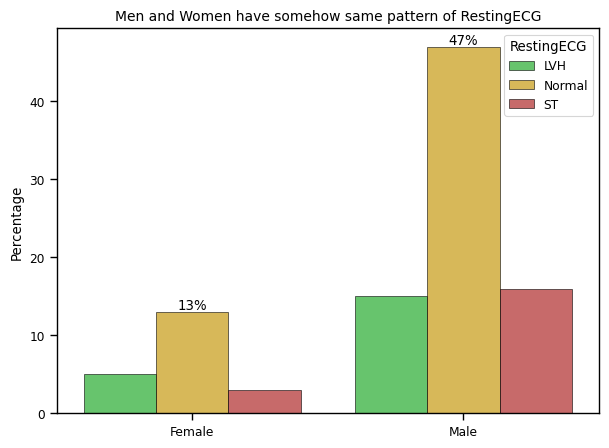

In [368]:
#PLotting the RestingECG Vs Sex

plt.figure(figsize=(7, 5))
sns.set_context("paper")
palette = {"LVH": "#2dc937", "Normal": "#e7b416", "ST": "#cc3232"}

ax1 = sns.barplot(
    data=RestingECG_vs_Sex,
    x="Sex",
    hue="RestingECG",
    y="Percentage",
    palette=palette,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8,
)

values1 = ax1.containers[1].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[1], labels=labels)

ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title(
    "Men and Women have somehow same pattern of RestingECG",
    fontsize=10
)
plt.show()

**4. ExerciseAngina Vs Sex**

Angina is a type of chest pain caused by reduced blood flow to the heart.
- Here, 'ExerciseAngina' referes to exercise-induced angina.
- Y: Yes, N: No

In [369]:
ExerciseAngina_vs_Sex = (
   data[["ExerciseAngina", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Percentage")
    .sort_values(by="ExerciseAngina")
)
ExerciseAngina_vs_Sex["Percentage"] = ExerciseAngina_vs_Sex["Percentage"].round(2) * 100
ExerciseAngina_vs_Sex

,ExerciseAngina,Sex,Percentage
0,N,Male,43.0
2,N,Female,16.0
1,Y,Male,36.0
3,Y,Female,5.0


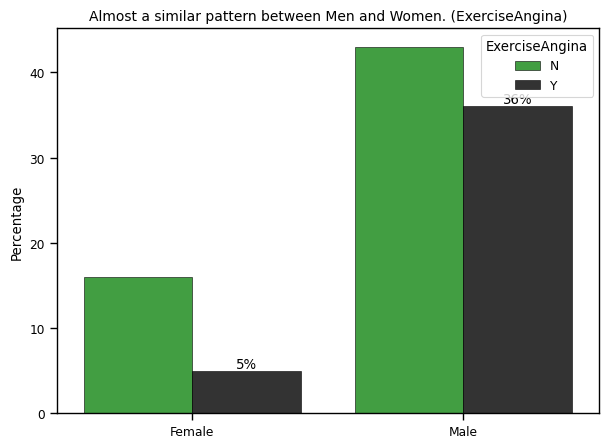

In [370]:
#PLotting ExerciseAngina Vs Sex

plt.figure(figsize=(7, 5))
sns.set_context("paper")
palette = {"Y": "#000000", "N": "#009900" }

ax1 = sns.barplot(
    data=ExerciseAngina_vs_Sex,
    x="Sex",
    hue="ExerciseAngina",
    y="Percentage",
     palette=palette,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8
)

values1 = ax1.containers[1].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[1], labels=labels)

ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title(
    "Almost a similar pattern between Men and Women. (ExerciseAngina)",
    fontsize=10
)
plt.show()

**5. ST_Slope Vs Sex**

ST_Slope is the slope of the peak exercise ST segment 
- Up: upsloping, Flat: flat, Down: downsloping
- Mainly Flat in (Males) and relatively up in (Females)

In [371]:
ST_Slope_vs_Sex = (
    data[["ST_Slope", "Sex"]]
    .value_counts(normalize=True)
    .reset_index(name="Percentage")
    .sort_values(by="ST_Slope")
)
ST_Slope_vs_Sex["Percentage"] = ST_Slope_vs_Sex["Percentage"].round(2) * 100
ST_Slope_vs_Sex

,ST_Slope,Sex,Percentage
4,Down,Male,6.0
5,Down,Female,1.0
0,Flat,Male,42.0
3,Flat,Female,8.0
1,Up,Male,31.0
2,Up,Female,12.0


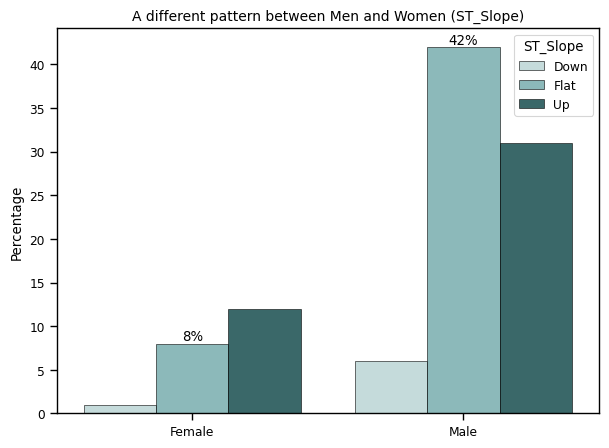

In [372]:
#PLotting ST_Slope Vs Sex

plt.figure(figsize=(7, 5))
sns.set_context("paper")
palette = {"Down": "#b2d8d8", "Flat": "#66b2b2", "Up": "#004c4c"}

ax1 = sns.barplot(
    data=ST_Slope_vs_Sex,
    x="Sex",
    hue="ST_Slope",
    y="Percentage",
     palette=palette,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.8
)

values1 = ax1.containers[1].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[1], labels=labels)

ax1.set_ylabel("Percentage")
ax1.set_xlabel("")
ax1.set_title(
    "A different pattern between Men and Women (ST_Slope)",
    fontsize=10
)
plt.show()

Observations -

- The majority 46% of the Male participants are in ASY category

- RestingBP: The majority of the participants are in the Normal category

Note: The percentage is calculated using all participants, NOT within each group of Sex

### Analysis of numerical columns

In [373]:
data.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease      category
dtype: object

In [374]:
#Defining numerical columns

num_col =[]
for col in data:
    if data[col].dtype !='category':
        num_col.append(col)

In [375]:
print('Numerical Column: ',num_col)

Numerical Column:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

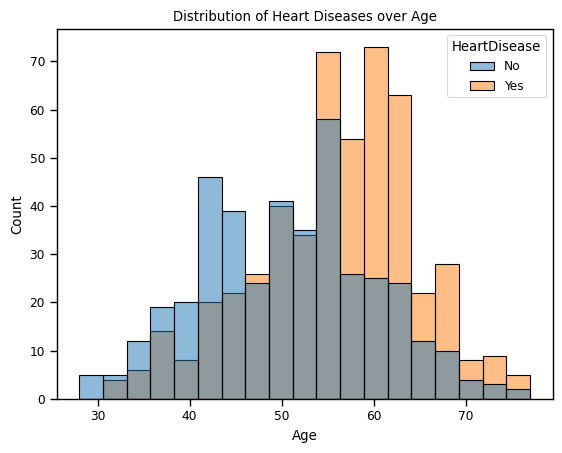

In [376]:
#Distrbution plot of Heart diseases Vs Age

sns.histplot(data = data ,x = 'Age', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Age")

Text(0.5, 1.0, 'Distribution of Heart Diseases Vs RestingBP')

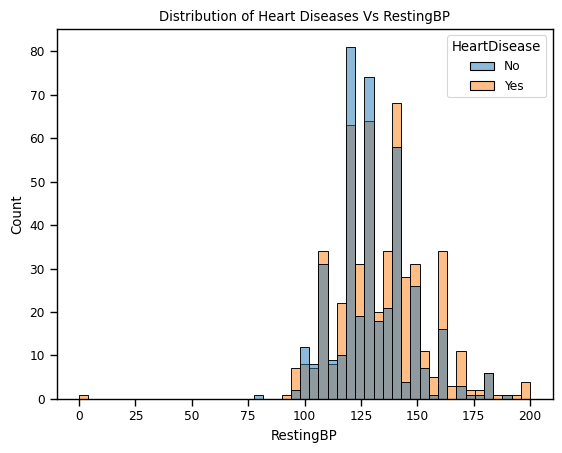

In [377]:
#Distrbution plot of Heart diseases Vs RestingBP
sns.histplot(data = data ,x = 'RestingBP', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases Vs RestingBP")

Text(0.5, 1.0, 'Distribution of Heart Diseases over Cholestrol')

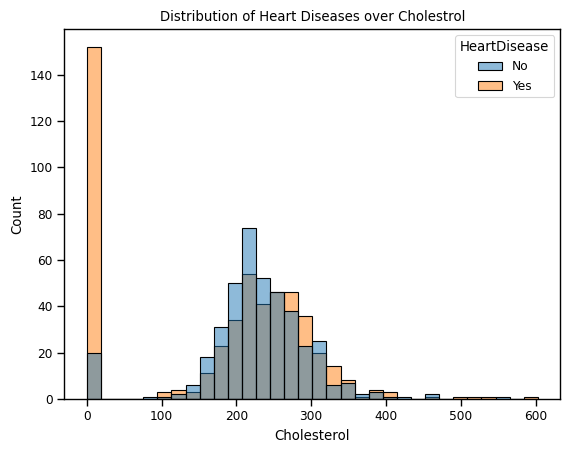

In [378]:
#Distrbution plot of Heart diseases Vs Cholesterol

sns.histplot(data = data ,x = 'Cholesterol', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Cholestrol")

Text(0.5, 1.0, 'Distribution of Heart Diseases over MaxHR')

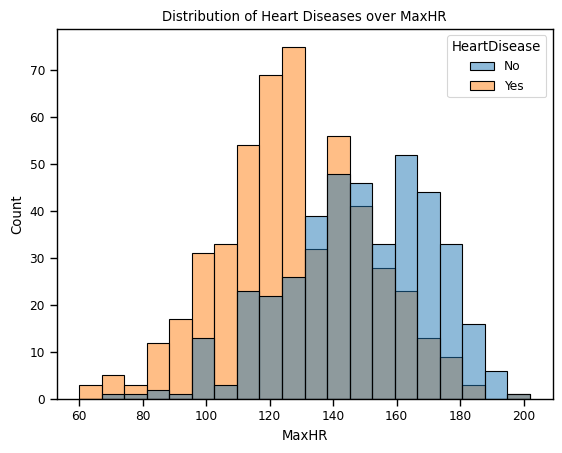

In [379]:
#Distrbution plot of Heart diseases Vs MaxHR

sns.histplot(data = data ,x = 'MaxHR', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over MaxHR")

Text(0.5, 1.0, 'Distribution of Heart Diseases over OldPeak')

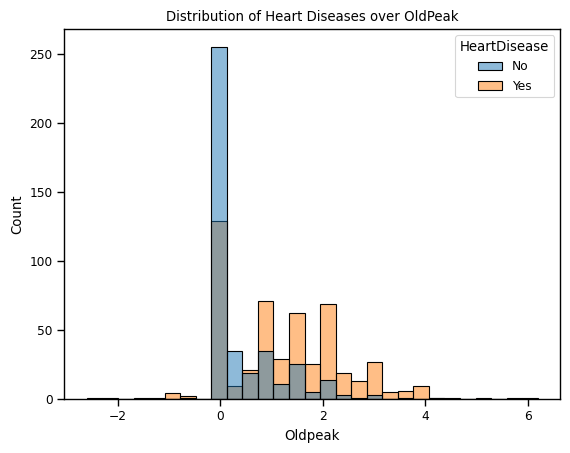

In [380]:
#Distrbution plot of Heart diseases Vs OldPeak

sns.histplot(data = data ,x = 'Oldpeak', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over OldPeak")

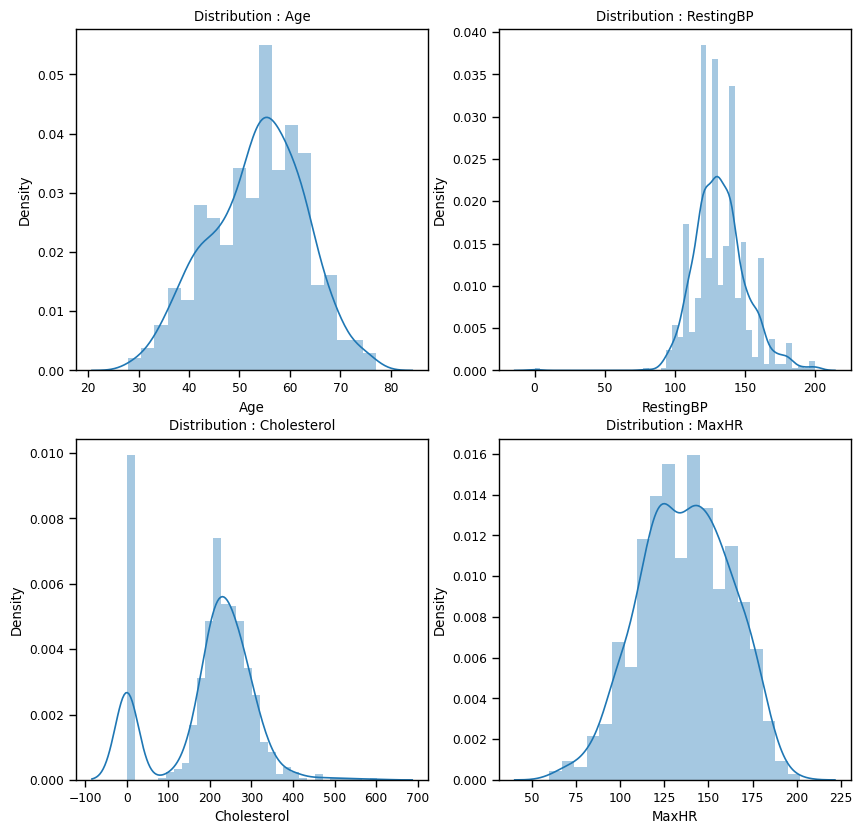

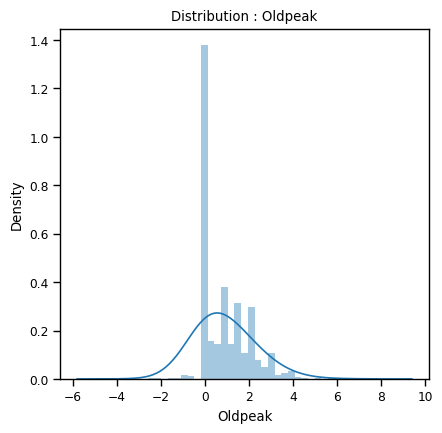

In [381]:
#Distribution plots

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(num_col) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[num_col[i]])
    title = 'Distribution : ' + num_col[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(data[num_col[len(num_col) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + num_col[len(num_col) - 1]
plt.title(title);

Observations - 
- People with higher OldPeak tend to have exercise angina. 
- Most patients with 0 OldPeak, do not have heart disease. 
- Cholestrol seems to be higher in females and people with low fasting blood sugar, although the difference is small. 
- Most patients have age between 55 and 65. 
- Most patients have RestingBP between 120 and 50.

### Analysis of the target column - HeartDisease

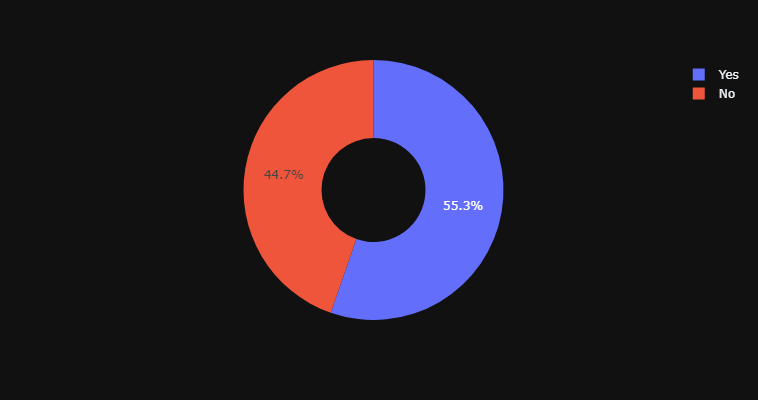

In [383]:
#counts in HeartDisease
#[1:Heart disease, 0:normal] 
fig = px.pie(data,names='HeartDisease',
            hole = 0.4,template='plotly_dark',
            width=600,height=400)
fig.show()

Observation: 

Acceptably balanced target column.

**Pairplot** -

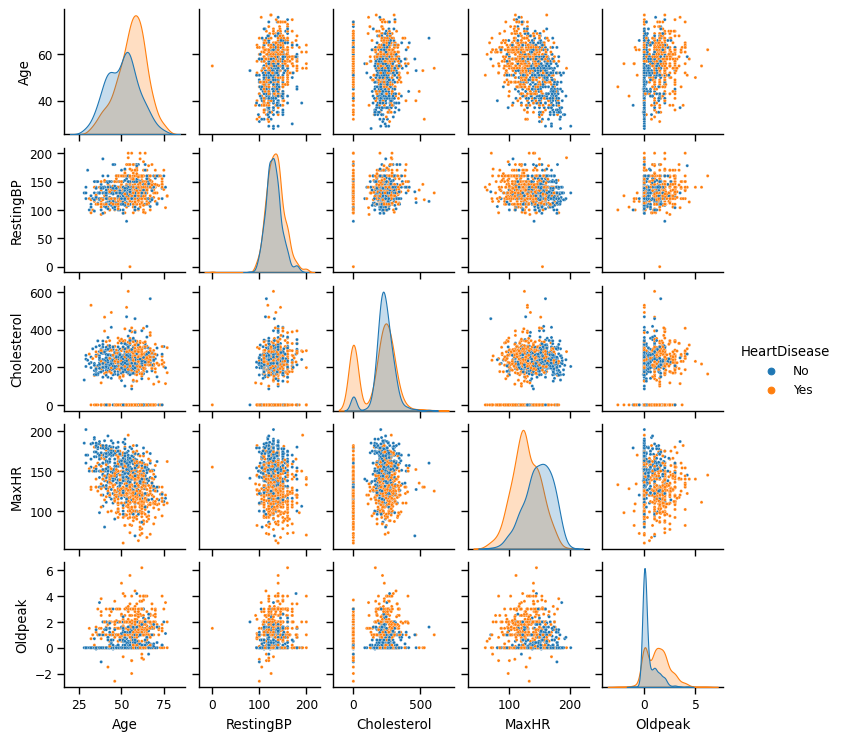

In [384]:
sns.pairplot(data,
    hue="HeartDisease",
    kind="scatter",
    diag_kind="kde",
    height=1.5,
    aspect=1,
    plot_kws=dict(s=5),
)
plt.show()

Observations:

In general, there is no big difference in the diagonal plot, Oldpeak and cholesterol however, have some extreme data points.

# Prediction of Heart Disease - 

### Data Preprocessing -

We first scale the features which are orders of magnitude away from 1 - Age, RestingBP, Cholesterol, MaxHR and Oldpeak.

In [385]:
col = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [386]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data[col] = data[col].apply(lb.fit_transform)

In [387]:
X = data.drop("HeartDisease", axis = 1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,Male,ATA,41,147,0,Normal,98,N,10,Up
1,21,Female,NAP,55,40,0,Normal,82,N,20,Flat
2,9,Male,ATA,31,141,0,ST,25,N,10,Up
3,20,Female,ASY,39,72,0,Normal,34,Y,25,Flat
4,26,Male,NAP,49,53,0,Normal,48,N,10,Up


In [456]:
y=data['HeartDisease']
y.head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: HeartDisease, dtype: category
Categories (2, object): ['No', 'Yes']

### Train/Test Split -

Now that the data is scaled, we perform the train-test-split procedure:

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42 , stratify=y, test_size = 0.2)
print(y_train.value_counts())

Yes    406
No     328
Name: HeartDisease, dtype: int64


In [459]:
from sklearn.preprocessing import QuantileTransformer

In [460]:
scaler=QuantileTransformer()
X_train =scaler.fit_transform(X_train[col])
X_test =scaler.transform(X_test[col])

### Using K-nearest neighbours (KNN) Model - 

##### We create our first KNN model with K=1:

In [519]:
KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean',p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [520]:
y_test_KNN_predictions = KNN.predict(X_test)
y_test_KNN_predictions

array(['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No

In [521]:
KNN.score(X_test,y_test)

0.7119565217391305

In [522]:
print(confusion_matrix(y_test,y_test_KNN_predictions))

[[55 27]
 [26 76]]


We observe a number of 27 False negatives (FN).

In [523]:
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test,y_test_KNN_predictions, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.68      0.67      0.67        82
        Normal       0.74      0.75      0.74       102

      accuracy                           0.71       184
     macro avg       0.71      0.71      0.71       184
  weighted avg       0.71      0.71      0.71       184



We observe an accuracy of 0.71. 
Let us try to optimize the KNN model by finding the best K value using the elbow method:

In [524]:
#For selecting K value
error_rate = []

for i in range(1,50):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

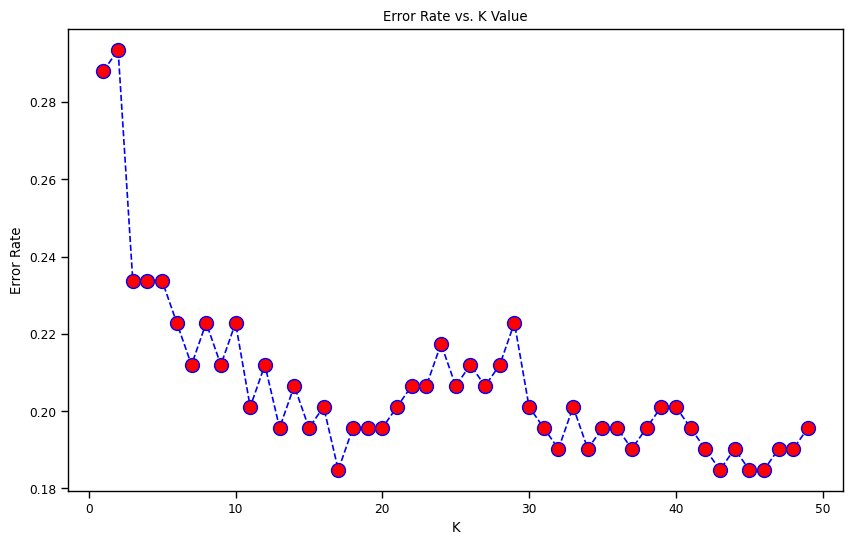

In [525]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Observations -
From the graph, K= 17 has a low error rate. 

Note - 
 - The best way to determine the value for "K" is to compare the accuracy at different K values. 
 - A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model. 

##### Optimising the KNN model by changing K=17: 

In [526]:
KNN = KNeighborsClassifier(n_neighbors=17, metric='euclidean',p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [527]:
y_test_KNN_predictions = KNN.predict(X_test)
y_test_KNN_predictions

array(['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'N

In [528]:
KNN.score(X_test,y_test)

0.8152173913043478

In [529]:
print(confusion_matrix(y_test,y_test_KNN_predictions))

[[66 16]
 [18 84]]


The model now has 16 false negatives (FN).

In [569]:
y_test_KNN_predictions= KNN.predict(X_test)
y_train_pred_KNN = KNN.predict(X_train)

test_acc_KNN = accuracy_score(y_test, y_test_KNN_predictions)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
target_names = ['Heart Diseases', 'Normal']
Clasification_report = classification_report(y_test, y_test_KNN_predictions, target_names=target_names)

print("Train set Accuracy: ", train_acc_KNN)
print("Test set Accuracy: ", test_acc_KNN)
print(" ")
print("************************************************")
print(" ")
print("Classification Report: ", Clasification_report)

Train set Accuracy:  0.771117166212534
Test set Accuracy:  0.8152173913043478
 
************************************************
 
Classification Report:                  precision    recall  f1-score   support

Heart Diseases       0.79      0.80      0.80        82
        Normal       0.84      0.82      0.83       102

      accuracy                           0.82       184
     macro avg       0.81      0.81      0.81       184
  weighted avg       0.82      0.82      0.82       184



Observation - 

K=17 gives an accuracy of 0.82. 

In [531]:
# Plotting the final Confusion Matrix
conf_matrix = confusion_matrix(y_test,KNN_predictions)

<AxesSubplot:>

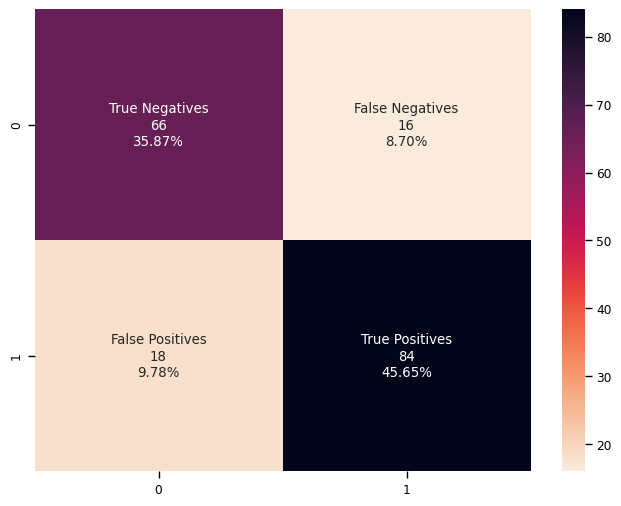

In [532]:
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Negatives','False Positives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt= '', cmap="rocket_r")

### Using Logistic Regression Model -

In [583]:
logModel = LogisticRegression()
logModel.fit(X_train,y_train)

LogisticRegression()

In [584]:
print('Accuracy:',logModel.score(X_test,y_test)) 

Accuracy: 0.7717391304347826


In [585]:
y_test_pred_LR = logModel.predict(X_test)
y_train_pred_LR = logModel.predict(X_train)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
Clasification_report = classification_report(y_test, y_test_pred_LR)

print("Train set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print(" ")
print("************************************************")
print(" ")
print("Classification Report: ", Clasification_report)

Train set Accuracy:  0.7411444141689373
Test set Accuracy:  0.7717391304347826
 
************************************************
 
Classification Report:                precision    recall  f1-score   support

          No       0.79      0.67      0.72        82
         Yes       0.76      0.85      0.81       102

    accuracy                           0.77       184
   macro avg       0.77      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184



In [586]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_LR)
conf_matrix

array([[55, 27],
       [15, 87]], dtype=int64)

<AxesSubplot:>

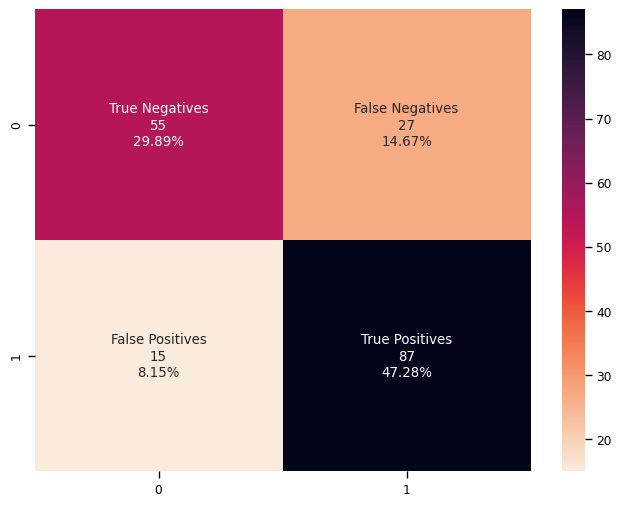

In [587]:
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Negatives','False Positives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt= '', cmap="rocket_r")

# Comparing Models -

The criterion for selecting the final model: Checking the difference between train and test accuracy (Checking the model in terms of overfitting) and then Checking the variance.

In [588]:
models = []
models.append(('logModel', LogisticRegression()))
models.append(('KNN', KNN))

results = []
names = []
for name, model in models:
    kfold = KFold(random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)

logModel: 0.741133 (0.028310)
KNN: 0.758885 (0.031579)


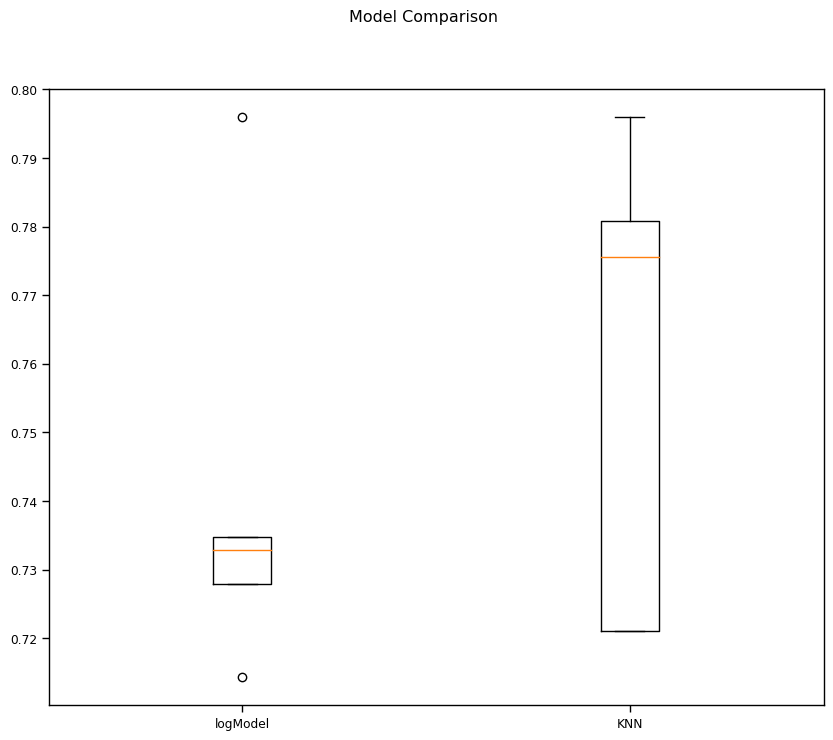

In [589]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion - 

Therefore, KNN is a better model than Logistic Regression Model.